In this notebook the code for my capstone will be nicely explained and commented. Below I will start by extracting the data from the csv files.


In [109]:
import csv
import pandas
import math
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
import datetime
from collections import Counter
import random
from statistics import mean


In [110]:
#if any of the used feautures has a NaN value it not be used.
df_sales2 = pandas.read_csv("sales2.csv")
c = df_sales2.columns[0:7]
df_sales = df_sales2.dropna(subset=c)
df_tokens = pandas.read_csv("tokens2.csv")

#every column is converted to a list since it is easier to work with but the index is now important since any change
#could mess up the data
usd_sales = df_sales['usd'].tolist()
tokenId_sales = df_sales['tokenId'].tolist()
timestamp_sales = df_sales['timestamp'].tolist()
buyer_sales = df_sales['buyer'].tolist()
seller_sales = df_sales['seller'].tolist()
rate_sales = df_sales['rate'].tolist()

creator_tokens = df_tokens['creator'].tolist()
tokenId_tokens = df_tokens['tokenId'].tolist()

#example of timestamp_sales
print(timestamp_sales[:5])

['2018-04-05T23:50:12Z', '2020-01-18T16:16:42Z', '2021-01-05T00:47:24Z', '2018-04-05T23:59:06Z', '2018-09-05T21:06:04Z']


Below I will make a basic matrix with only three features as the first three colums, namely the year when the artwork got sold, the month, and the creator. The creator will only be unique when he made 40 or more sales, else he will go in the "other" category.

In [111]:
matrix_basic = np.zeros((len(timestamp_sales),5))

count = 0
#first day something got sold in this dataset. 
first_day = datetime.datetime(2018, 4, 5)

#list with datetime.datetime of sale of every sale
lstdays = []

#list with days since first sale of every sale
lstdays2 = []


for i in timestamp_sales:
    date = i.split("T")[0]
    time = i.split("T")[1][0:-1]
    #getting a datetime format out of timestamps.
    #print(time)
    date2 = datetime.datetime(int(date[0:4]),int(date[5:7]),int(date[8:]),hour = int(time[0:2]),minute = int(time[3:5]), second = int(time[6:]))
    #print(date2)
    date_year = date[:4]
    date_months = date[5:7]
    matrix_basic[count][0] = int(date_year) - 2017 
    matrix_basic[count][1] = int(date_months)
    delta = date2 - first_day
    daydiff = delta.days
    lstdays.append(date2)
    lstdays2.append(daydiff)
    count = count + 1
#the first 10 dates have been tested 
    
#dict with keys tokens and values creator
dict_toccrea = dict()
countt = 0
for i in tokenId_tokens:
    dict_toccrea[i] = creator_tokens[countt]
    countt = countt + 1
    
listwcreato = []
for i in tokenId_sales:

    listwcreato.append(dict_toccrea[i])
dictcrea = dict()
#print(listwcreato)
#listwcreato first 10 have been tested and are correct
countercreator = Counter(listwcreato)
count7 = 0
count7_1 = 2
#if the artist has sold more than 40 artworks he will get an unique vale in the dictionary
for i in listwcreato:
    if countercreator[i] >= 20:
        if i in dictcrea.keys():
            matrix_basic[count7][2] = dictcrea[i]
            count7 = count7 + 1
        else:
            dictcrea[i] = count7_1
            matrix_basic[count7][2] = dictcrea[i]
            count7 = count7 + 1
            count7_1 = count7_1 + 1  
    else:
        matrix_basic[count7][2] = 1
        count7 = count7 + 1

#the value of past artworks sold by the creator.
#source: https://stackoverflow.com/questions/5419204/index-of-duplicates-items-in-a-python-list
def duplicates(lst, item):
    return [i for i, x in enumerate(lst) if x == item]


count3 = 0
lstwithindx = []
#we got a list with all indexes in the sales.csv file that have the same creator
for i in listwcreato:
    lst = duplicates(listwcreato, i)
    lstwithindx.append(lst)
#lstwithindx got tested for the first 11 and it was correct
count4 = 0
value = []
for i in lstwithindx:
    lst12 = []
    for j in i:
        #when the datetime precedes the sale time then it will get added to the list of values. 
        if lstdays[j] < lstdays[count4]:
            lst12.append(usd_sales[j])
            
            #if count < 5:
                #print(str(lstdays[j]) + str(lstdays[count4]))
    count4 =count4+1
    value.append(lst12)
print(value[:12])


[[], [175.4256, 175.4256, 422.2995, 170.36100000000005, 170.36100000000005, 1212.7724, 696.05, 865.38, 640.84, 693.57, 1158.02, 861.82, 302.18804, 861.82, 299.0294, 1671.36, 804.92, 798.4960000000002, 44.88399999999999, 224.04, 2154.9, 191.28], [175.4256, 13050.0, 175.4256, 422.2995, 170.36100000000005, 4880.0, 170.36100000000005, 1212.7724, 696.05, 865.38, 640.84, 693.57, 1158.02, 861.82, 302.18804, 13121.823999999999, 861.82, 299.0294, 1671.36, 804.92, 798.4960000000002, 44.88399999999999, 224.04, 4373.99, 13642.65, 2154.9, 191.28, 4737.18, 0.24284, 0.24284, 0.24284, 0.24284, 13356.2, 23.98653782, 134.59050000000002], [175.4256], [175.4256, 175.4256, 170.36100000000005, 170.36100000000005, 1212.7724, 696.05, 865.38, 640.84, 693.57, 1158.02, 861.82, 302.18804, 861.82, 299.0294, 1671.36, 798.4960000000002, 44.88399999999999], [175.4256, 175.4256], [175.4256, 13050.0, 175.4256, 422.2995, 170.36100000000005, 170.36100000000005, 1212.7724, 696.05, 865.38, 640.84, 693.57, 1158.02, 861.82, 

In the list value now all the prices of past artworks of the same creator are represented. The average will be taken to get a nice feature. However there are still some special cases to deal with. What to do when the list is empty and when it is the first artwork of a creator or when it is the first artwork ever sold on this platform. When the list is empty the value of all the artworks prior to selling will be used instead. And for the first ever artwork a random number between 1 and 100 will be used. 

In [112]:
avg_value = []
count9 = 0 
for i in value:
    #first artwork ever
    if count9 == 0:
        np.random.seed(42)
        avg_value.append(np.random.randint(1,101))
        count9 = count9 + 1
        continue
    #first artwork of creator # I am not sure wheter this is possible or whether it will mess with the linear regression
    elif i == [] and count9 != 0:
        #days of art since first sale. 
        dateofart = lstdays2[count9]
        two_weeks = []
        count10 = 0
        #getting all artworks indecis 2 weeks before till artwork.
        for j in lstdays2:
            if dateofart > j >= (dateofart-14):
                two_weeks.append(count10)
            count10 = count10 + 1
        sales = []
        for k in two_weeks:
            sales.append(usd_sales[k])
        avg_value.append(mean(sales))
        count9 = count9 + 1
        
    #mean of past artwork by same creators
    elif i != []:
        avg_value.append(mean(i))
        count9 = count9 + 1

count12 = 0
for i in avg_value:
    matrix_basic[count12][3] = i
    count12 = count12 + 1
    

print(avg_value[:5])

[52, 663.4201154545455, 2340.4752839377143, 175.4256, 635.1648847058824]


Now that we have our first 4 basic features ready we should look at whether the features correlate, because if they do the linear regression will not work. So we will need to do some profiling.

In [121]:
#source: https://github.com/Giovanni1085/covid-19_wikipedia/blob/master/Notebook_5_regression.ipynb
#make a dataframe again from a matrix
dataframe = pandas.DataFrame(matrix_basic[:,:4])
print(dataframe.head)

from pandas_profiling import ProfileReport

profile = ProfileReport(dataframe, title='Pandas Profiling Report', html={'style':{'full_width':True}})

profile.to_widgets()

<bound method NDFrame.head of          0    1      2            3
0      1.0  4.0    2.0    52.000000
1      3.0  1.0    2.0   663.420115
2      4.0  1.0    2.0  2340.475284
3      1.0  4.0    2.0   175.425600
4      1.0  9.0    2.0   635.164885
...    ...  ...    ...          ...
17474  4.0  3.0    1.0  9367.431670
17475  4.0  3.0  186.0  2306.311432
17476  4.0  3.0    1.0  9367.431670
17477  4.0  3.0    1.0  4366.404346
17478  4.0  3.0    1.0  1142.841333

[17479 rows x 4 columns]>


As you can see in the correlation tab of the report most of the features are not correlated at all. Only feature 0 (years) and 1 (months) show a small negative pearson's r. For now I think we can go on with these features. First we will need to normalize these features and regularize the price.

In [146]:
from sklearn.preprocessing import normalize
#normalize
norm_matrix_basic = normalize(matrix_basic,axis = 0)

#regularize
reg_ytrue = []
for i in usd_sales:
    r = math.log(i +1, 10)
    reg_ytrue.append(r)
    
#adding sale value to matrix so shuffling will work. 
count101 = 0 
for i in reg_ytrue:
    norm_matrix_basic[count101][4] = i
    count101 = count101 + 1
lst_feat = [norm_matrix_basic]
print(norm_matrix_basic)

[[2.43595421e-03 4.25311038e-03 1.48080211e-04 1.84960049e-04
  2.24656160e+00]
 [7.30786263e-03 1.06327759e-03 1.48080211e-04 2.35973494e-03
  4.11564379e+00]
 [9.74381685e-03 1.06327759e-03 1.48080211e-04 8.32489274e-03
  5.04265425e+00]
 ...
 [9.74381685e-03 3.18983278e-03 7.40401057e-05 3.33192427e-02
  3.67815586e+00]
 [9.74381685e-03 3.18983278e-03 7.40401057e-05 1.55309685e-02
  3.50211016e+00]
 [9.74381685e-03 3.18983278e-03 7.40401057e-05 4.06499978e-03
  3.28035251e+00]]


msq = 1230682527.033956
Coefficient of determination: 0.57


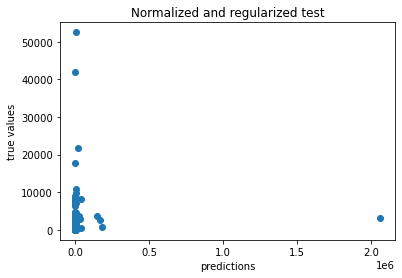

In [148]:
for i in lst_feat:
    np.random.seed(42)
    np.random.shuffle(i)
    
    training = round(len(i[:,1])*0.8)
    #starts from 10785
    test = training
    X_train = i[:training, :4]   
    X_test  = i[test:, :4]
    y_train = i[:training, 4]
    y_test  = i[test:, 4]
    
    linreg = LinearRegression().fit(X_train,y_train)
    #print("score" + str((linreg.score(X_train,y_train))))
    
    y_pred = linreg.predict(X_test)
        
    #source https://machinelearningmastery.com/feature-selection-with-real-and-categorical-data/
    fig, ax = plt.subplots()
       
    y_predxreg = []
    y_truexreg = []
        
    #does it go wrong here? # the base of regularization = 10
    for j in y_pred:
        l = 10 ** j - 1
        
        y_predxreg.append(l)
            
    for k in y_test:
        l2 = 10 ** k - 1
       
        y_truexreg.append(l2)
    ax.scatter(y_predxreg,y_truexreg)
    ax.set_ylabel("true values")
    ax.set_xlabel("predictions")
    ax.set_title("Normalized and regularized test")
    from sklearn.metrics import mean_squared_error, r2_score
    #the msq is super large, because of a prediction that is of the chart.
    print("msq = " + str(mean_squared_error(y_truexreg, y_predxreg)))
    print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))
    
    
    
    
    

In [116]:
#here you can see the value of test and value. 
for i in range(20):
    
    print("this is test vs pred:" + str(y_truexreg[i]) + "   " + str(y_predxreg[i]))
    


this is test vs pred:3505.7399999999957   1328.7884764209348
this is test vs pred:117.27   379.1247465020609
this is test vs pred:82.56849999999997   369.3807375641762
this is test vs pred:619.931   468.84760129327697
this is test vs pred:3708.7999999999943   385.3118273344203
this is test vs pred:91.73250000000002   23.61251237423442
this is test vs pred:106.23999999999987   153.3673432384345
this is test vs pred:487.55100000000004   732.9366502758854
this is test vs pred:740.939999999999   1088.9783588542157
this is test vs pred:520.0543999999995   748.5069514539017
this is test vs pred:168.0559999999999   211.40362058811328
this is test vs pred:22.696499999999993   60.543302669014324
this is test vs pred:195.14   240.39231358709372
this is test vs pred:125.18450000000001   289.77883314489185
this is test vs pred:92.09999999999997   61.00834388998758
this is test vs pred:9028.199999999986   1928.861438737739
this is test vs pred:48.8274   68.76089095696193
this is test vs pred:588.71

As you can see there is still something wrong with the predictions since sometimes the prediction is just way off the chart. Below there will be a simple neural network trying to predict the price. 

In [132]:
from sklearn.neural_network import MLPRegressor
for i in lst_feat:
        clf3 = MLPRegressor(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(15, 6), random_state=42,max_iter=2500)
        clf3.fit(X_train, y_train)
        y_hat_test_n = clf3.predict(X_test)
        
        y_predxreg2 = []
        
        
        for r in y_hat_test_n:
            #l = math.e ** i - 1
            l3 = 10 ** r - 1
            y_predxreg2.append(l3)
        
        
        
        print("msq1 = " + str(mean_squared_error(y_truexreg, y_predxreg2)))
        print("msq1, still regularized = " + str(mean_squared_error(y_test, y_hat_test_n)))

msq1 = 580964039219.3889
msq1, still regularized = 0.31285215320683707


I am still not sure where the fault and mistake is. Below I will add other features that can be used for further models.

In [124]:
from collections import Counter

#feature_extra_1 

#add buy guy with unique number if he did more than 15 buys
dictbuy = dict()
count22 = 0
count33 = 1
coun = Counter(buyer_sales)


for i in buyer_sales:
    
    if i in dictbuy.keys():
            #matrix[count2][3] = dictbuy[i]
            count22 = count22 + 1
    else:
        dictbuy[i] = count33
        #matrix[count2][3] = dictbuy[i]
        count33 = count33 + 1
        count22 = count22 + 1
 #checl whether counter of number is higher then 15
dict_buy15 = dict()
count_2_1 = 2
other = 1
for i in dictbuy.keys():
    if coun[i] >= 15:
        dict_buy15[i] = count_2_1
        count_2_1 = count_2_1 + 1
    else:
        dict_buy15[i] = other       

#dict_buy15 is a dictionary that could be added to the matrix

#feature_extra_2

#add sale guy with unique number if he did more than 15 sales        
dictsell = dict()
count4 = 0
count5 = 1
for i in seller_sales:
    if i in dictsell.keys():
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
    else:
        dictsell[i] = count5
        #matrix[count4][4] = dictsell[i]
        count4 = count4 + 1
        count5 = count5 + 1      

coun2 = Counter(seller_sales)

dict_sell15 = dict()
count2_2_1 = 2
other2 = 1
for i in dictsell.keys():
    if coun2[i] >= 15:
        dict_sell15[i] = count2_2_1
        count2_2_1 = count2_2_1 + 1
    else:
        dict_sell15[i] = other2 

#dict_sell15 is a dictionary that could be added to the matrix

#feature_extra_2
#add rates
count6 =0
r22 = []
for i in rate_sales:
    r22.append(i)
    count6 = count6 + 1